In [17]:
import pandas as pd
import numpy as np
from zooniverse_config import date
from zooniverse_utils import load_posterior_dicts_dataframe, show_triplet_and_posteriors, readinzooniverse



In [5]:
posteriors = load_posterior_dicts_dataframe(f"outputs/posteriorsdf_saved_{date}.pqt")

In [6]:
preals = posteriors['preals']
skills = posteriors['skills']
labels = posteriors['labels']    
len(preals)

90736

In [9]:
subjects = np.array(list(preals.keys()))
subjects

array([113677536, 113677537, 113677538, ..., 115998000, 115998001,
       115998002])

In [10]:
chainlength = np.array([len(preals[k]) for k in preals.keys()])
chainlength

array([11,  7,  8, ...,  7,  8,  8])

In [11]:
post_real = np.array([preals[k][-1] for k in preals.keys()])
post_real

array([9.95274617e-01, 6.99792449e-01, 9.48971113e-01, ...,
       8.27051290e-01, 1.11585164e-03, 5.30756392e-04])

In [12]:
pthreshold = 0.1
over_thr_posteriors = (post_real > 1 - pthreshold) | (post_real < pthreshold)
over_thr_posteriors.sum()

76648

In [14]:
stable_posteriors = np.array([(np.diff(preals[k][-4:])<0.01).all() for k in preals.keys()]) & \
                        ((post_real > 1 - pthreshold) | (post_real < pthreshold))
stable_posteriors.sum()

52931

reading in saved file outputs/zooniversedf_saved_02012026.csv


3it [00:18,  6.29s/it]


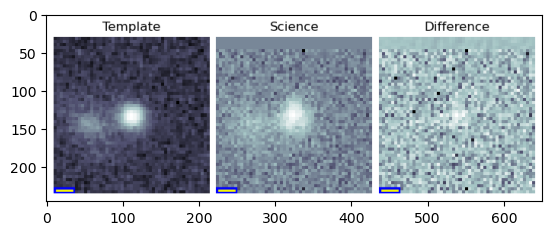

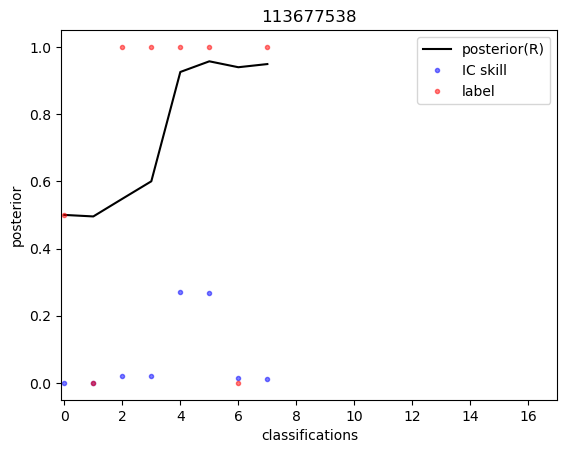

In [18]:
zooniverse, multilabel, users =  readinzooniverse(f"outputs/zooniversedf_saved_{date}.csv")
show_triplet_and_posteriors(113677538, zooniverse, posteriors=None,
                                posteriors_file=f"outputs/posteriorsdf_saved_{date}.pqt")


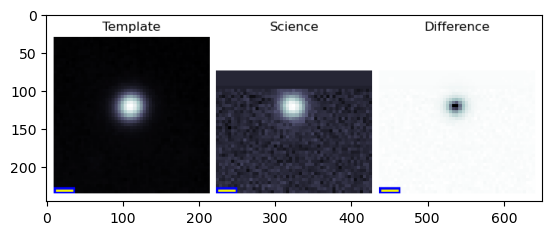

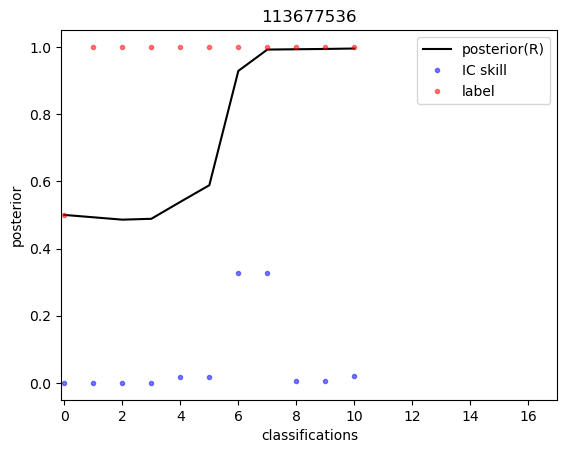

In [21]:
posteriors = {"preals":preals, "skills":skills, "labels":labels}
show_triplet_and_posteriors(113677536, zooniverse, posteriors=posteriors)

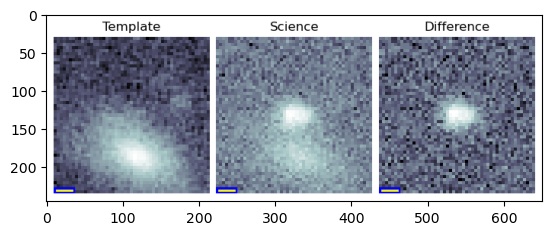

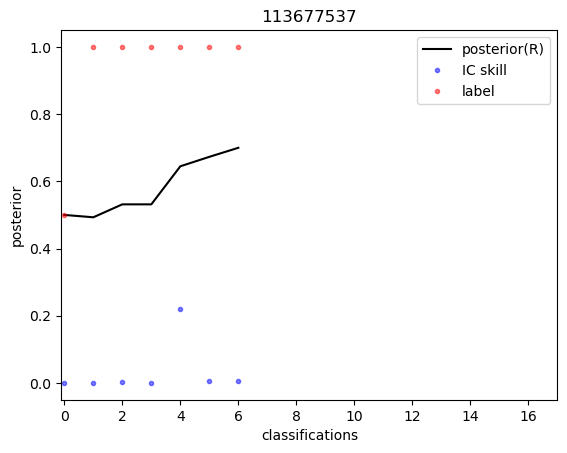

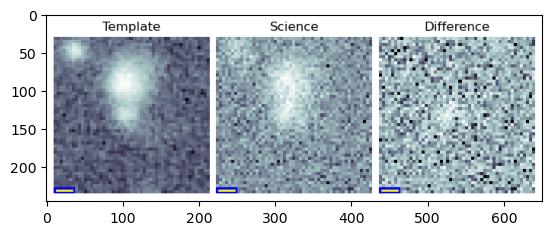

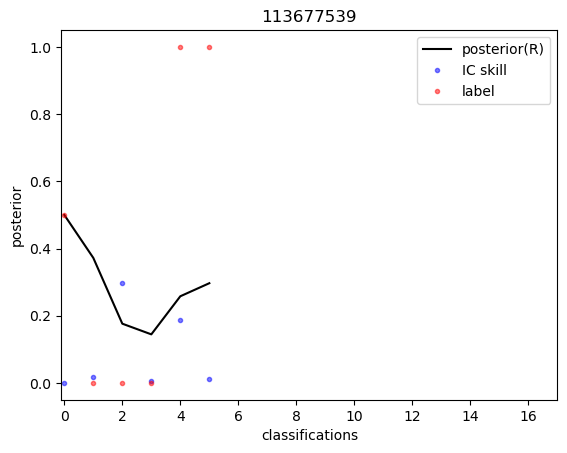

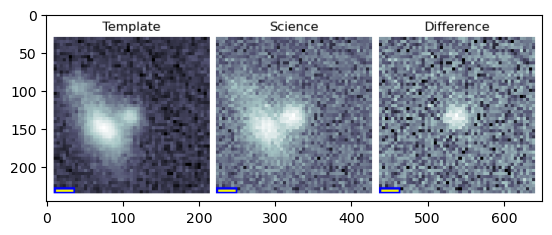

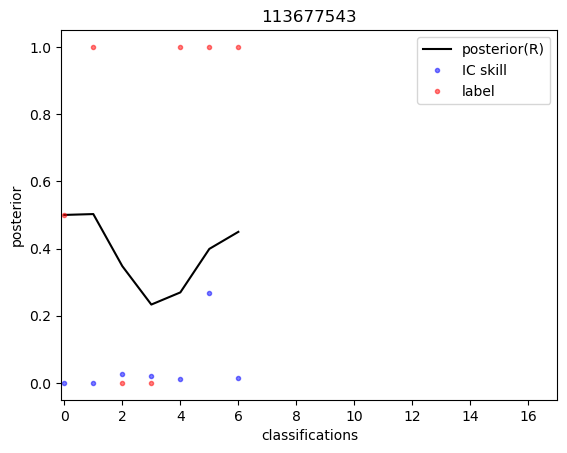

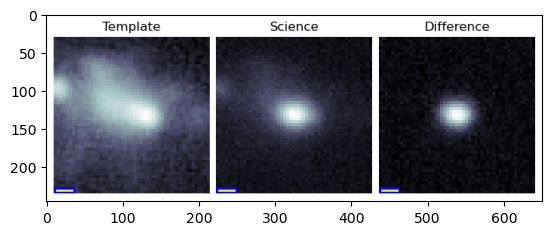

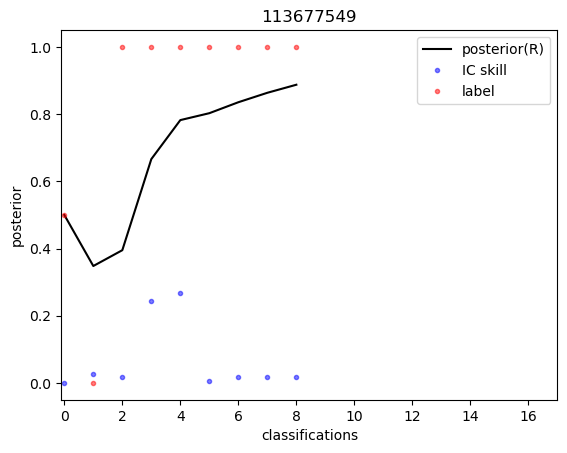

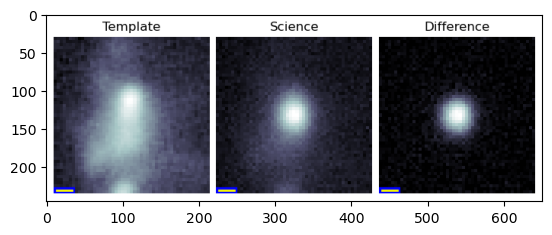

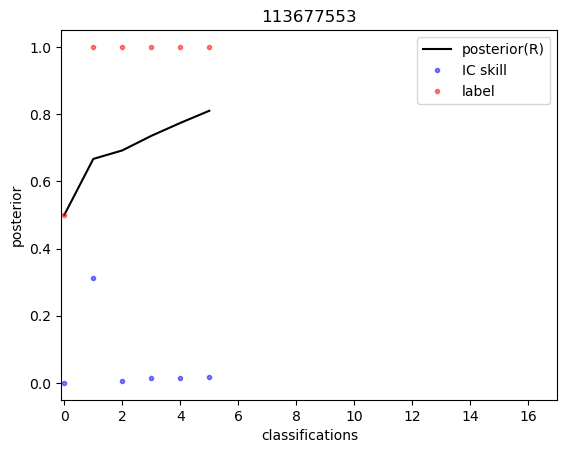

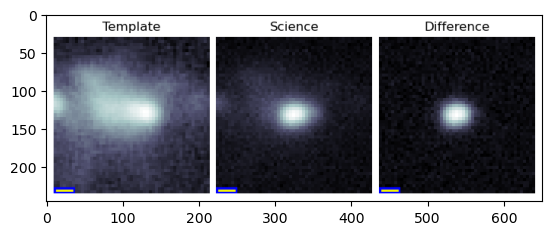

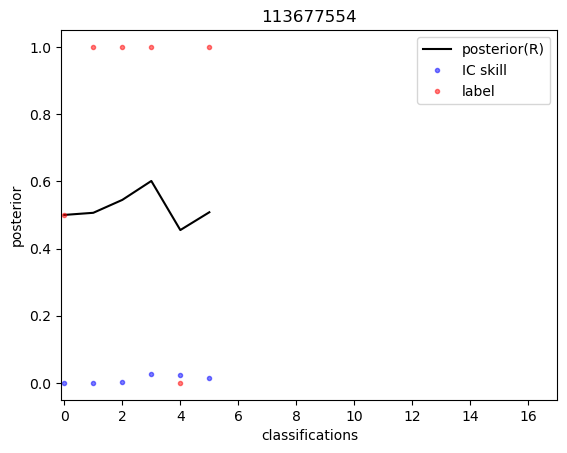

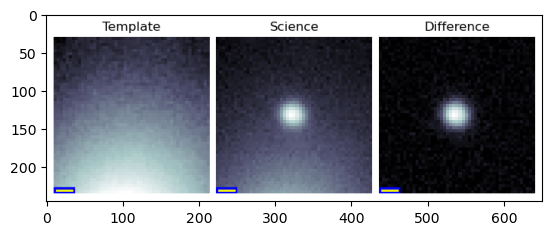

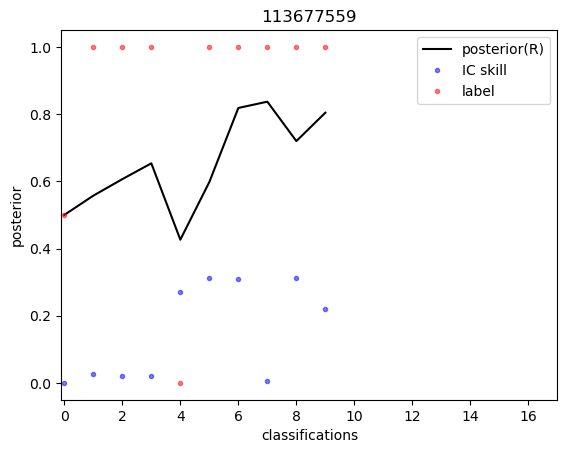

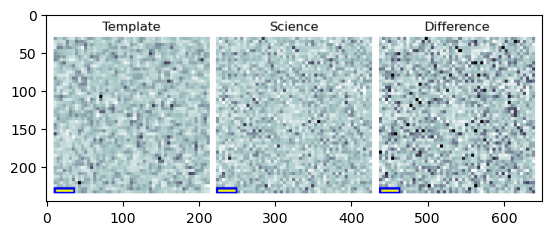

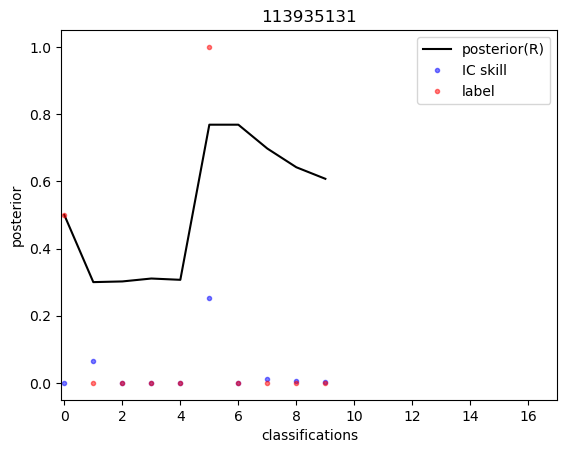

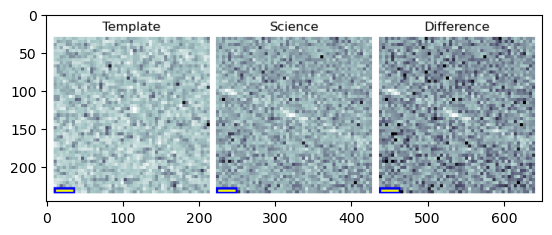

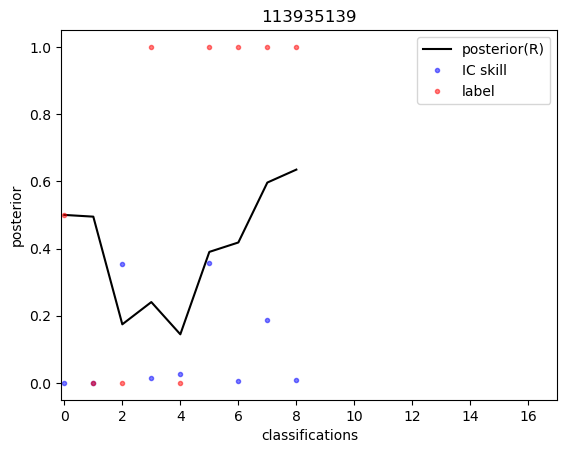

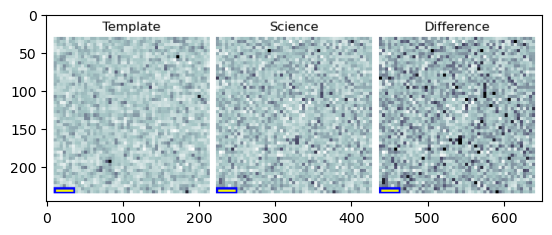

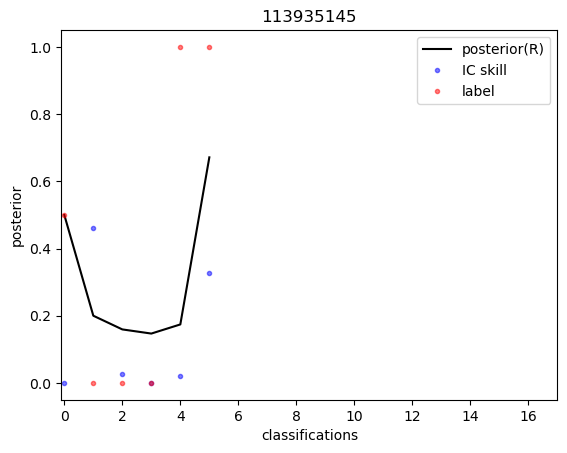

In [23]:
for s in subjects[~over_thr_posteriors][:10]: #the ones that did not converge yet
    show_triplet_and_posteriors(s, zooniverse, posteriors=posteriors)